# Lending Club Case Study

**Problem Statement**

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Step 1 - Importing all the required libraries for EDA

In [151]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

### Step 2 - Loading the Data from the CSV file

In [152]:
#Loading the Data from the CSV file
loan_df=pd.read_csv('loan.csv')

In [153]:
#Reading the Data from the loan_df 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [154]:
#understading the number of rows and columns in the Data Set
loan_df.shape

(39717, 111)

In [155]:
#As we can see there are 111 columns in the Dataset setting an option to see all the columns in the Dataset
pd.set_option('display.max_columns', None)

###  Step 3 - Data Cleansing:- Cleaning the Data, Checking for Null Values , Outliers , Imputing Null Values

In [156]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [51]:
#Checking the Number of Null Values present in each column of the Dataset 
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

From the Above we can see that there are certain columns in which all the values are Null

In [157]:
#Checking the Columns in which all the values are Null
null_columns = loan_df.columns[loan_df.isnull().all()]
print("Columns with all null values:")
print(null_columns)


Columns with all null values:
Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pa

In [158]:
#Droping the columns from the Dataset where ever the value is true
loan_df = loan_df.drop(columns=null_columns)


In [159]:
#checking the info about the Dataset again after dropping the null values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

So from the above information we can see that there are 58 columns in which all the values were Null and all of those columns have been dropped from the Dataset

In [160]:
#Checking for the number of unique values in each column 
unique_counts = loan_df.nunique()

# Printing the result 
print("Number of unique values in each column:")
for column, count in unique_counts.items():
    print(f"{column}: {count}")

Number of unique values in each column:
id: 39717
member_id: 39717
loan_amnt: 885
funded_amnt: 1041
funded_amnt_inv: 8205
term: 2
int_rate: 371
installment: 15383
grade: 7
sub_grade: 35
emp_title: 28820
emp_length: 11
home_ownership: 5
annual_inc: 5318
verification_status: 3
issue_d: 55
loan_status: 3
pymnt_plan: 1
url: 39717
desc: 26527
purpose: 14
title: 19615
zip_code: 823
addr_state: 50
dti: 2868
delinq_2yrs: 11
earliest_cr_line: 526
inq_last_6mths: 9
mths_since_last_delinq: 95
mths_since_last_record: 111
open_acc: 40
pub_rec: 5
revol_bal: 21711
revol_util: 1089
total_acc: 82
initial_list_status: 1
out_prncp: 1137
out_prncp_inv: 1138
total_pymnt: 37850
total_pymnt_inv: 37518
total_rec_prncp: 7976
total_rec_int: 35148
total_rec_late_fee: 1356
recoveries: 4040
collection_recovery_fee: 2616
last_pymnt_d: 101
last_pymnt_amnt: 34930
next_pymnt_d: 2
last_credit_pull_d: 106
collections_12_mths_ex_med: 1
policy_code: 1
application_type: 1
acc_now_delinq: 1
chargeoff_within_12_mths: 1
delin

From the above analysis we can see that there are columns which have only 1 unique values. so we can go ahead and drop such columns because they will got play a major role in our analysis

In [161]:
unique_count_columns = loan_df.columns[loan_df.nunique() == 1]
loan_df = loan_df.drop(columns=unique_count_columns)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

So from the above analysis you can see that the columns which had only one unique value have been dropped from the Dataset.

In [57]:
#checking the percentage of Null values remaning in each of the 48 columns
null_percentage = loan_df.isnull().mean() * 100
print("Percentage of null values in each column:")
print(null_percentage)

Percentage of null values in each column:
id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000

In [162]:
#  Most of the values in mths_since_last_record is NA/0 , we can drop that column
loan_df.drop("mths_since_last_record", axis=1, inplace=True)

In [163]:
# Dropping url column as it does not contribute to the analysis. The loan id in the url is already available in the column 'id'.
loan_df.drop("url", axis=1, inplace=True)

In [164]:
# Rows with loan_status = "Current" can be removed as it does not contribute to the analysis. Since the loan is still in progress we can't decide on the result as of now and can be removed for current analysis.
loan_df = loan_df[~(loan_df.loan_status == "Current")]

In [165]:
# Since all the Current status loans are removed, next_pymnt_d has no significance and can be dropped
loan_df.drop("next_pymnt_d", axis=1, inplace=True)

In [166]:
# As 64.66% of the data in mths_since_last_delinq column is NA, it can't be used for analysis/conclusion, hence dropping it
loan_df.drop("mths_since_last_delinq", axis=1, inplace=True)

In [167]:
# id and member_id are both unique values has no significance in predicting if the customer would default, hence dropping one of those and keeping other as primary key
loan_df.drop(["member_id"], axis=1, inplace=True)

In [168]:
# total_pymnt, total_pymnt_inv, last_pymnt_amnt, last_pymnt_d, total_rec_int, revol_bal, total_rec_prncp, recoveries, collection_recovery_fee, total_rec_late_fee, earliest_cr_line, last_credit_pull_d, last_pymnt_d, out_prncp_inv, out_prncp, delinq_2yrs columns are dropped as they are info related to post approval of loan which does not contribute to the current analysis
loan_df.drop(["total_pymnt", "total_pymnt_inv", "last_pymnt_amnt", "last_pymnt_d", "total_rec_int", "revol_bal", "total_rec_prncp", "recoveries", "collection_recovery_fee", "total_rec_late_fee", "earliest_cr_line", "last_credit_pull_d", "last_pymnt_d", "out_prncp_inv", "out_prncp", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "total_acc", "revol_util"], axis=1, inplace=True)

In [169]:
# title, emp_title columns has text values and high degree of unique values and does not be a factor in decsion making, hence dropping
loan_df.drop(["title", "emp_title"], axis=1, inplace=True)

In [170]:
# zip_code is a demographic data and does not play a significant role to analysis
loan_df.drop(["zip_code"], axis=1, inplace=True)

In [171]:
# Around 32% of the desc column is NA and also it can't be used for a concrete conclusions, hence dropping it

loan_df.drop("desc", axis=1, inplace=True)

In [172]:
# Checking shape of the data frame

loan_df.shape

(38577, 19)

In [173]:
# Check for percentage of Null values

loan_df.isnull().sum()/loan_df.shape[0] * 100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

### Step 4 - Removing the Outliers from the Dataset

In [174]:
print(loan_df["annual_inc"])

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38577, dtype: float64


In [175]:
loan_df["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [176]:
#Checking the values at different percentiles
column_name = 'annual_inc'

percentiles = [25, 50, 75, 90, 95, 99]

percentile_values = loan_df[column_name].quantile([p / 100 for p in percentiles])


print("Values at different percentiles:")
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {value:.2f}")



Values at different percentiles:
25th percentile: 40000.00
50th percentile: 58868.00
75th percentile: 82000.00
90th percentile: 115000.00
95th percentile: 140004.00
99th percentile: 234144.00


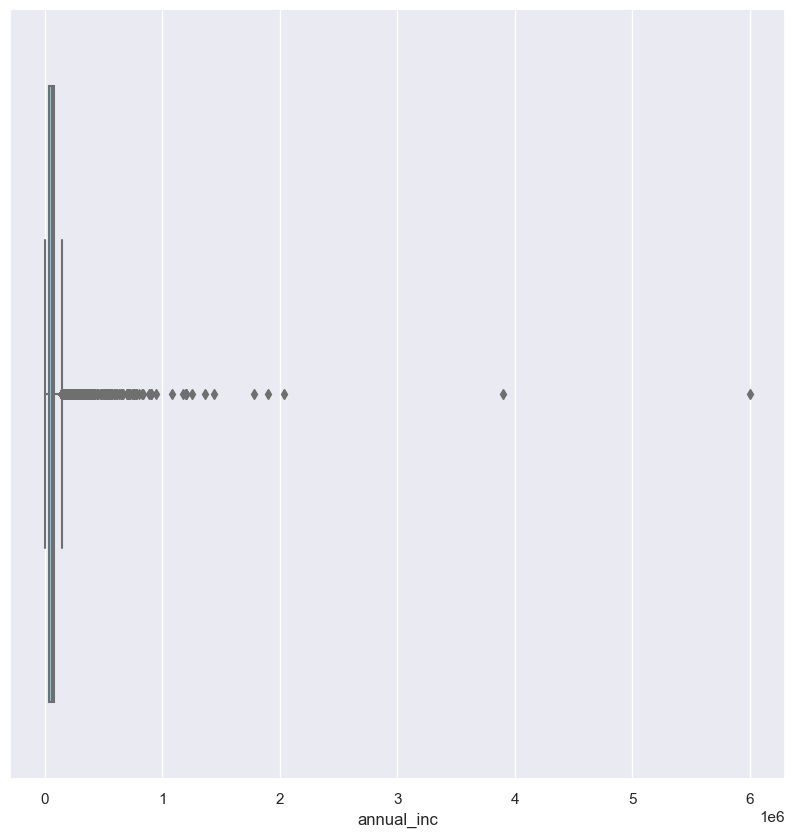

In [179]:
#Plotting the box plot to visualise the outliers in the annual inc column
plt.figure(figsize=(10, 10))
sns.boxplot(x=loan_df.annual_inc, color='skyblue')
plt.show()

From the Above Box plot we can see that anuual inc column has more number of outliers.

In [180]:
#Removing the Data based on the 95th percentile as it has huge difference comapred to other percentiles
loan_df = loan_df[loan_df.annual_inc <= loan_df.annual_inc.quantile(0.95)]
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,92402,5000,5000,700.0,36 months,8.70%,158.30,B,B1,5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,CO,15.55,NaN
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN


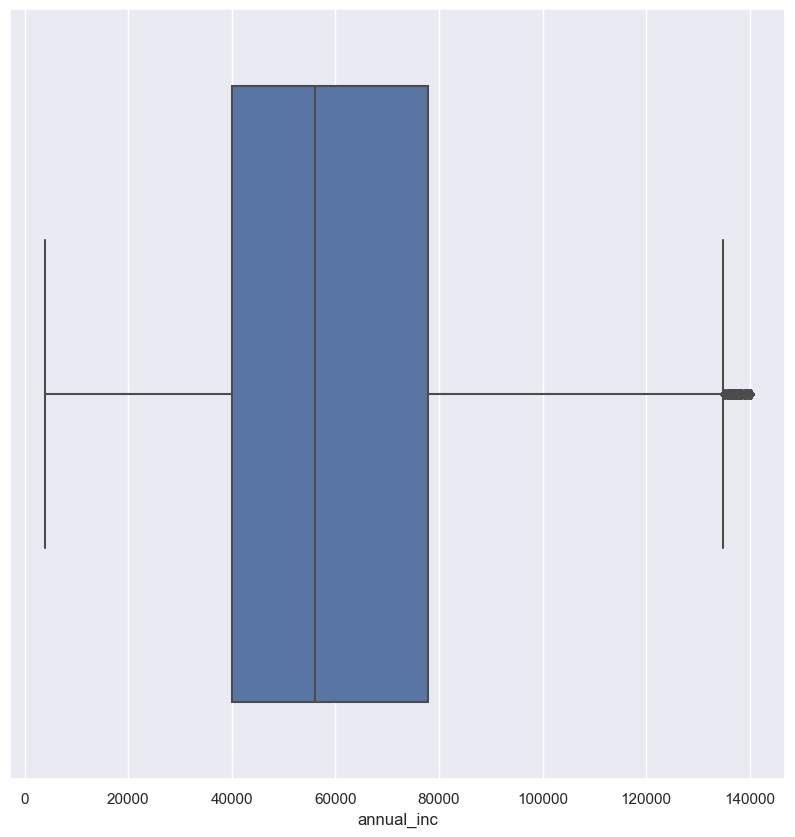

In [181]:
# After removal of outliers checking the annual inc column again 
plt.figure(figsize=(10,10))
sns.boxplot(x=loan_df.annual_inc)
plt.show()

### Step 5 - Data Cleaning - Since  Majority of the null values has been removed and Outliers as well  now we can handle the remaining missing values - Standardising values

In [182]:
# Since 2.7% of emp_length is NaN and this variable might play a key role in analysing if the borrower have a steady employment status and be able to repay the loan. So better to remove missing values than imputing, which may alter the analysis
loan_df = loan_df[~(loan_df.emp_length.isna())]

In [183]:
# Only 1.8% of pub_rec_bankruptcies is NaN and mode of the column is 0 and around 95% od data has value 0, so imputing the rows with NaN with 0 is safe
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.fillna(value=0)

In [184]:
# Display shape of the data frame
loan_df.shape

(35640, 19)

In [185]:
# Check for percentage of missing values
loan_df.isnull().sum()/loan_df.shape[0] * 100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Step 6 - Standardising the Data and Adding Derived Columns

In [186]:
# int_rate can be converted to float values by removing the % sign and make it more appropriate for analysis
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(x.replace("%","")))

In [187]:
# Standardizing issue_d column to dateTime format
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')

In [188]:
# Convert emp_length column to numerical value which can be more easily analysed later
loan_df.emp_length = loan_df.emp_length.apply(lambda x : 0 if "<" in x else 10 if "+" in x else int(x[0]))

In [189]:
# Splitting issue_d into issue_month and issue_year for more easy analysis and removing issue_d

loan_df["issue_month"] = loan_df.issue_d.apply(lambda x : x.month)
loan_df["issue_year"] = loan_df.issue_d.apply(lambda x : x.year)
loan_df.drop("issue_d", axis=1, inplace=True)

In [190]:
# Ratio of funded_amnt_inv to annual_inc is added as a derived column inorder to check for the efficiency of the borrower to pay the amount back
loan_df["funded_to_income"] = loan_df.funded_amnt_inv / loan_df.annual_inc

In [191]:
loan_df.shape

(35640, 21)

In [192]:
# Resetting Index
loan_df.reset_index(inplace=True)
loan_df.drop("index", axis=1, inplace=True)

### Step 7 - Performing the Univariate Analysis on Different Data Points 

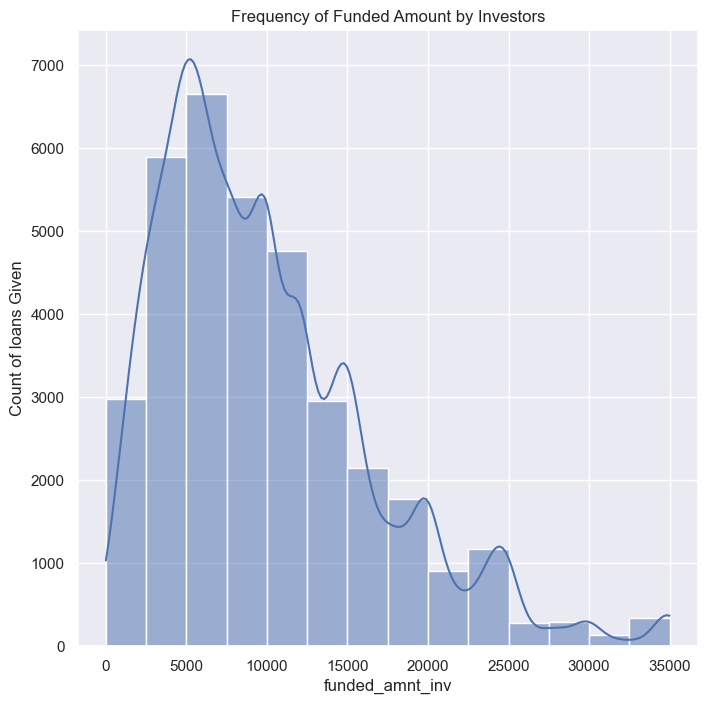

In [214]:
# Plotting a histogram for the funded_amnt_inv to get to know what is the most approved loan amount
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.histplot(loan_df.funded_amnt_inv, kde=True, stat = "count", bins=14)
plt.ylabel('Count of loans Given')
plt.title("Frequency of Funded Amount by Investors")
plt.show()

### 
- From the above histogram We can say that **most of the funding** was between the **2500 - 10000 range**.

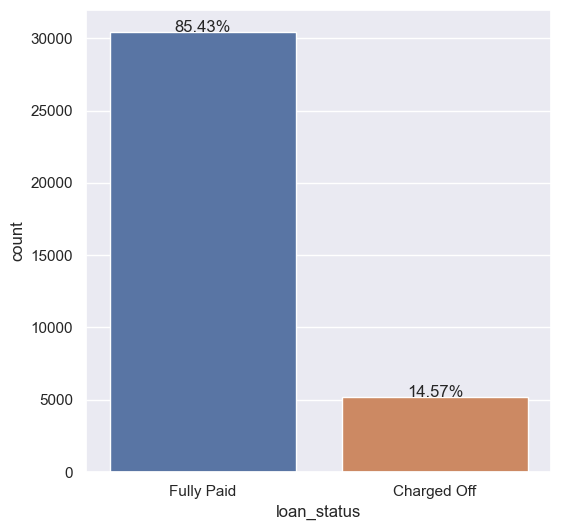

In [195]:
# Plotting a Count Plot for loan_status to get loan status distribution
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=loan_df.loan_status)  # Specify the x parameter
total = len(loan_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
plt.show()

### 
- The above count plot indicates that **85.43%** of the loans approved was **Fully Paid** and a **14.57%** of loans was **defaulted**

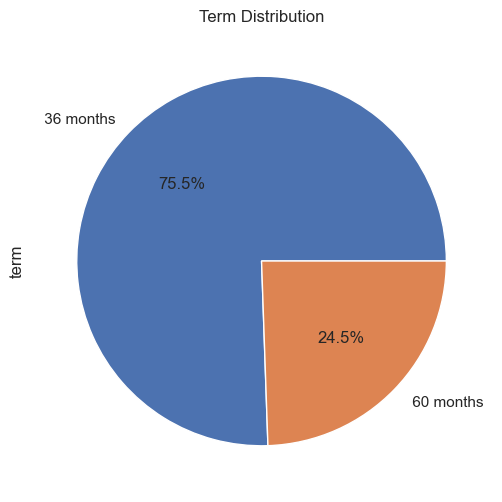

In [196]:
# Plotting a Pie Plot for term to understand the distribution
plt.figure(figsize=(6,6)) 
loan_df.term.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Term Distribution")
plt.show()

- The above pie chart shows that around **75.6%** of loans was taken under **36 months** term and **24.4%** under **60 months** term

In [197]:
emp_length_counts = loan_df['emp_length'].value_counts()
print(emp_length_counts)

10    7888
0     4327
2     4101
3     3824
4     3200
5     3044
1     3043
6     2073
7     1644
8     1343
9     1153
Name: emp_length, dtype: int64


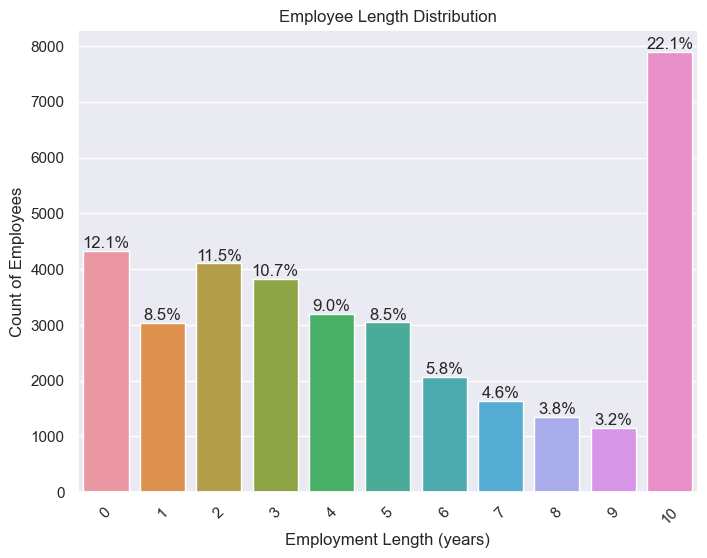

In [198]:
# Resizing the graph
plt.figure(figsize=(8, 6))
loan_df['emp_length'] = loan_df['emp_length'].astype(str)
order = [str(i) for i in range(11)]  # Assuming emp_length ranges from '0' to '10'
ax = sns.countplot(x='emp_length', data=loan_df, order=order)
total = len(loan_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title("Employee Length Distribution")
plt.xlabel("Employment Length (years)")
plt.ylabel("Count of Employees")
plt.xticks(rotation=45)
plt.show()

-
From the above plot we can 12.1 % of the employees have 0-1 years of Employment and 22.1 % of employees have 10 or above years 

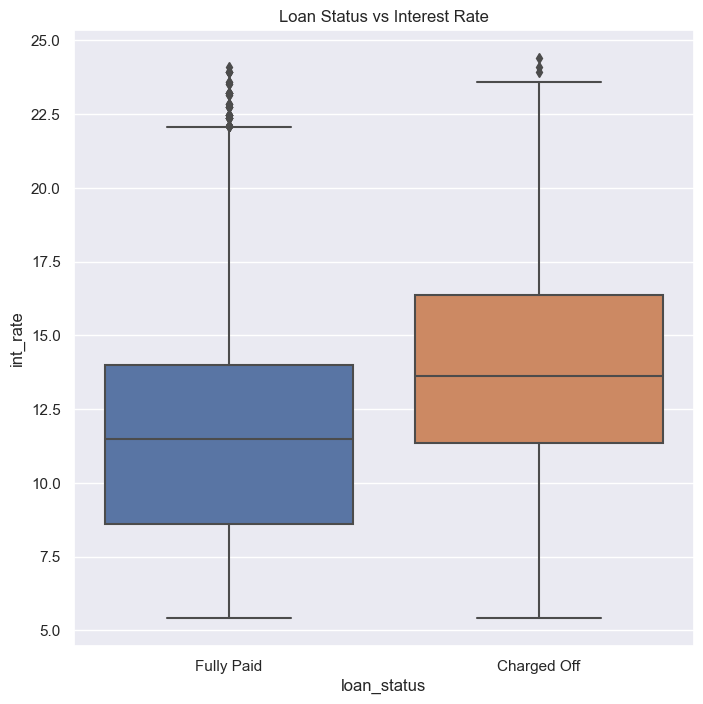

In [217]:
# Plotting a box plot of loan_status vs int_rate
plt.figure(figsize=(8, 8))

# Plotting box plot with seaborn
sns.boxplot(x='loan_status', y='int_rate', data=loan_df)

# Setting the title
plt.title("Loan Status vs Interest Rate")

# Display the plot
plt.show()

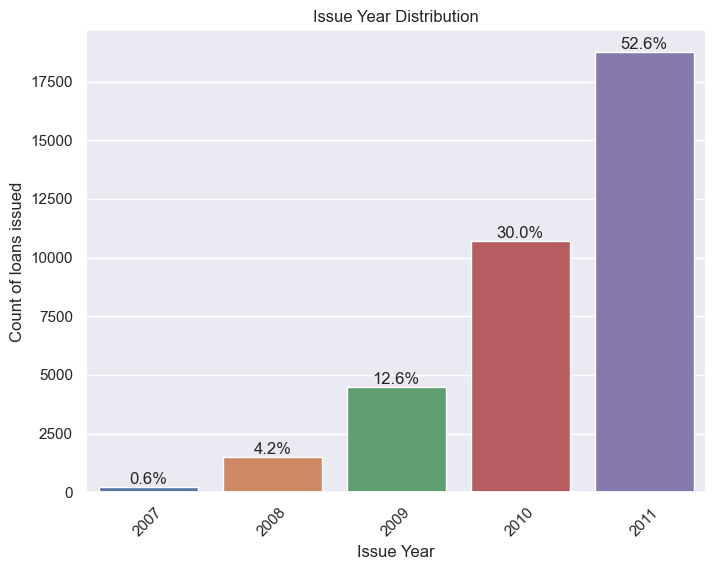

In [199]:
# Plotting a Count Plot for issue_year to get Issue Year Distribution 
plt.figure(figsize=(8, 6))
loan_df['issue_year'] = loan_df['issue_year'].astype(str)
sorted_years = sorted(loan_df['issue_year'].unique())
ax = sns.countplot(x='issue_year', data=loan_df,order=sorted_years)
total = len(loan_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title("Issue Year Distribution")
plt.xlabel("Issue Year")
plt.ylabel("Count of loans issued")
plt.xticks(rotation=45)
plt.show()


-
From the above plot we can say that 2011 was the year in which most number of loans were issued out to total loans that is 52.1 %

In [200]:
# Plotting a bar graph with the percentage of people defaulted across each grade category wrt to grade

# Creating a pivot table with grade and loan_status with count as aggfunc
loan_grade_pivot = pd.pivot_table(data=loan_df, index="grade", columns="loan_status", values="id", aggfunc="count")
loan_grade_pivot

loan_status,Charged Off,Fully Paid
grade,,
A,550,8716
B,1307,9481
C,1266,6053
D,1048,3683
E,645,1762
F,283,586
G,94,166


In [201]:
# Adding Percentage column to it and calculating percenatge of defaulters for each grade category
loan_grade_pivot ["Percentage"] = loan_grade_pivot["Charged Off"] / (loan_grade_pivot ["Fully Paid"] + loan_grade_pivot["Charged Off"]) * 100
loan_grade_pivot

loan_status,Charged Off,Fully Paid,Percentage
grade,,,
A,550,8716,5.935679
B,1307,9481,12.115313
C,1266,6053,17.297445
D,1048,3683,22.151765
E,645,1762,26.796843
F,283,586,32.566168
G,94,166,36.153846


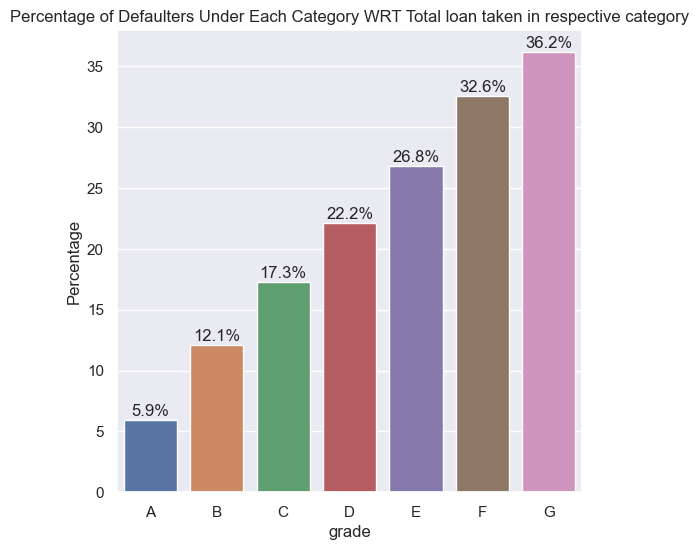

In [202]:
# Plotting barplot using seaborn
plt.figure(figsize=(6,6))
ax = sns.barplot(data=loan_grade_pivot, x=loan_grade_pivot.index, y="Percentage")
# Annotate percentage values
for p in ax.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() 
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title("Percentage of Defaulters Under Each Category WRT Total loan taken in respective category")
plt.show()

- The above barplot gives a clear conclusion/insights that higher the grade at which the loans are taken, more the chance of defaulting. 
- Around **36%** of the loan takers under **G** category has defulated
- The above box plot of Loan Status vs Interest Rate also indicate the same, that higher the interest rates higher the chance of defaulting
- Grades and Interest Rate is closely linked, as the interest rate increases, grades increase and vice versa, indicating that Grades is a bucketed version of interest rate
- Hence from these 2 plots, we can conclude that the loan taken under high interest rate or grades are tend to defualt more than the others

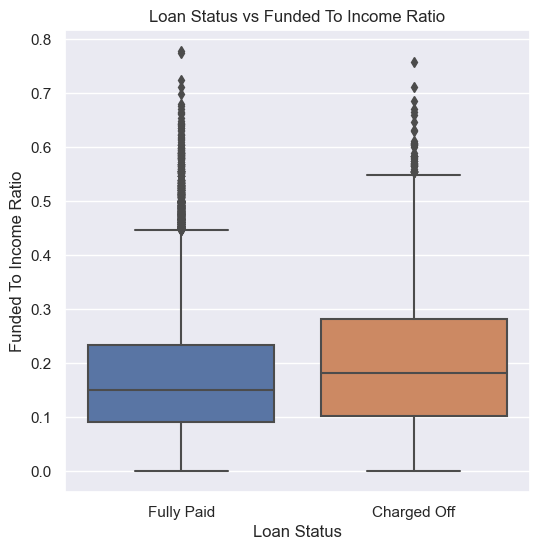

In [203]:
# Plotting a box plot of loan_status vs int_rate
plt.figure(figsize=(6, 6))
sns.boxplot(x='loan_status', y='funded_to_income', data=loan_df)
plt.title("Loan Status vs Funded To Income Ratio")
plt.xlabel("Loan Status")
plt.ylabel("Funded To Income Ratio")
plt.show()

### Inferences from Univariate Analysis -
- Majority of the Loan Amount Requested/Sanctioned falls between **2500 - 10000** range.
- **85.4%** of the loans approved was Fully Paid and a 14.6% of loans was defaulted.
- Around **22%** of the total loan are taken by people who had 10+ Years of employee length, indicating that people tend to take loans more on a later stage of life.
- The loan issued increases drastically year by year, **2011** has over **50%** of the all issued loans. This can be due to several reasons.
    1. Life Getting Tougher Over Years
    2. Recession in 2011
    3. LC became popular over years
- **Loan Status vs Interest Rate** Box plot gives a strong indication that most of the defaulters tend to fall on higher interest rates when compared to non defaulters  
- The **Percentage of Defaulters Under Each Category WRT Grade** barplot gives a clear conclusion/insights that higher the grade at which the loans are taken, more the chance of defaulting. 
- Around **36%** of the loan takers under **G** category has defulated
- **Loan Status vs Funded To Income Ratio** Box plot gives a slight indication that most of the defaulters fall on high f_to_i ratio value, whereas majority of the Fully Paid are on the lower ratio end
- Grade/Sub Grade is linked to Interest rate, Higher the grade higher the interest rate
- Term Distribution Pie chart shows that around **75.6%** of loans was taken under **36 months term** and **24.4%** under **60 months** term 

### Step 8 - Performing the Bivariate Analysis

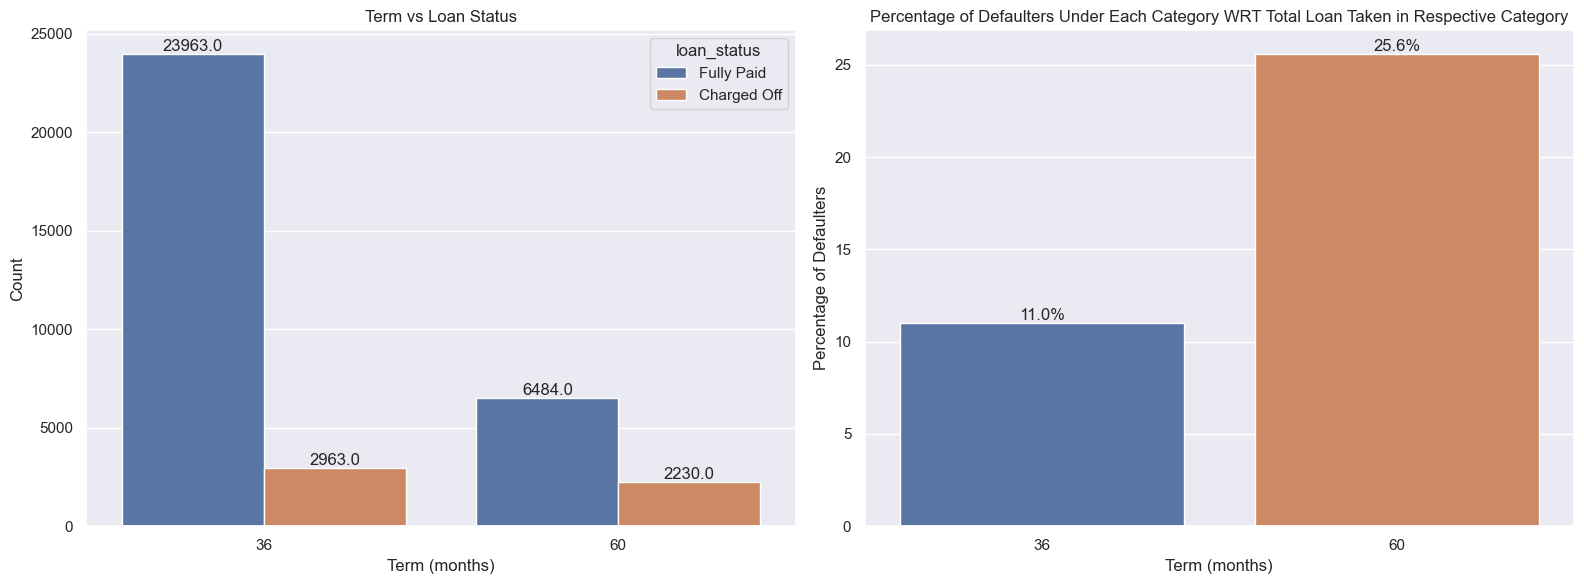

In [204]:

# Preprocessing the 'term' column
loan_df['term'] = loan_df['term'].str.extract('(\d+)').astype(int)

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot 1 - Count Plot
ax1 = sns.countplot(x='term', hue='loan_status', data=loan_df, ax=axes[0])
axes[0].set_title('Term vs Loan Status')
axes[0].set_xlabel('Term (months)')
axes[0].set_ylabel('Count')

# Annotate count values
for p in ax1.patches:
    count = f'{p.get_height()}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(count, (x, y), ha='center', va='bottom')

# Creating Pivot table for term as index and loan_status as columns
loan_term_pivot = pd.pivot_table(data=loan_df, index="term", columns="loan_status", values="id", aggfunc="count")

# Adding Percentage column to get the percentage of people defaulted under each category wrt loan taken under each category
loan_term_pivot["Percentage"] = loan_term_pivot["Charged Off"] / (loan_term_pivot["Fully Paid"] + loan_term_pivot["Charged Off"]) * 100

# Subplot 2 - Bar Plot
ax2 = sns.barplot(x=loan_term_pivot.index, y="Percentage", data=loan_term_pivot, ax=axes[1])
axes[1].set_title('Percentage of Defaulters Under Each Category WRT Total Loan Taken in Respective Category')
axes[1].set_xlabel('Term (months)')
axes[1].set_ylabel('Percentage of Defaulters')

# Annotate percentage values
for p in ax2.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- From count plot for **Term vs Loan Status**, its clear that out of **8714** who opted for **60 Months** as term **2230** has defaulted, means around **25.6 %**, where as for those opted **36 Months** only **2963** out of **26923** deafulted, thats just **11%**
- The **Percentage of Defaulters Under Each Category WRT Total loan taken in respective category** shows the same information with respect to percentage values in a barplot.
- This gives a clear indication that **people opted for longer duration installments are going to default more**, than people opted shorter duration
- So always insist on lending money for shorter duration

['Fully Paid' 'Charged Off']
Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')
Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')


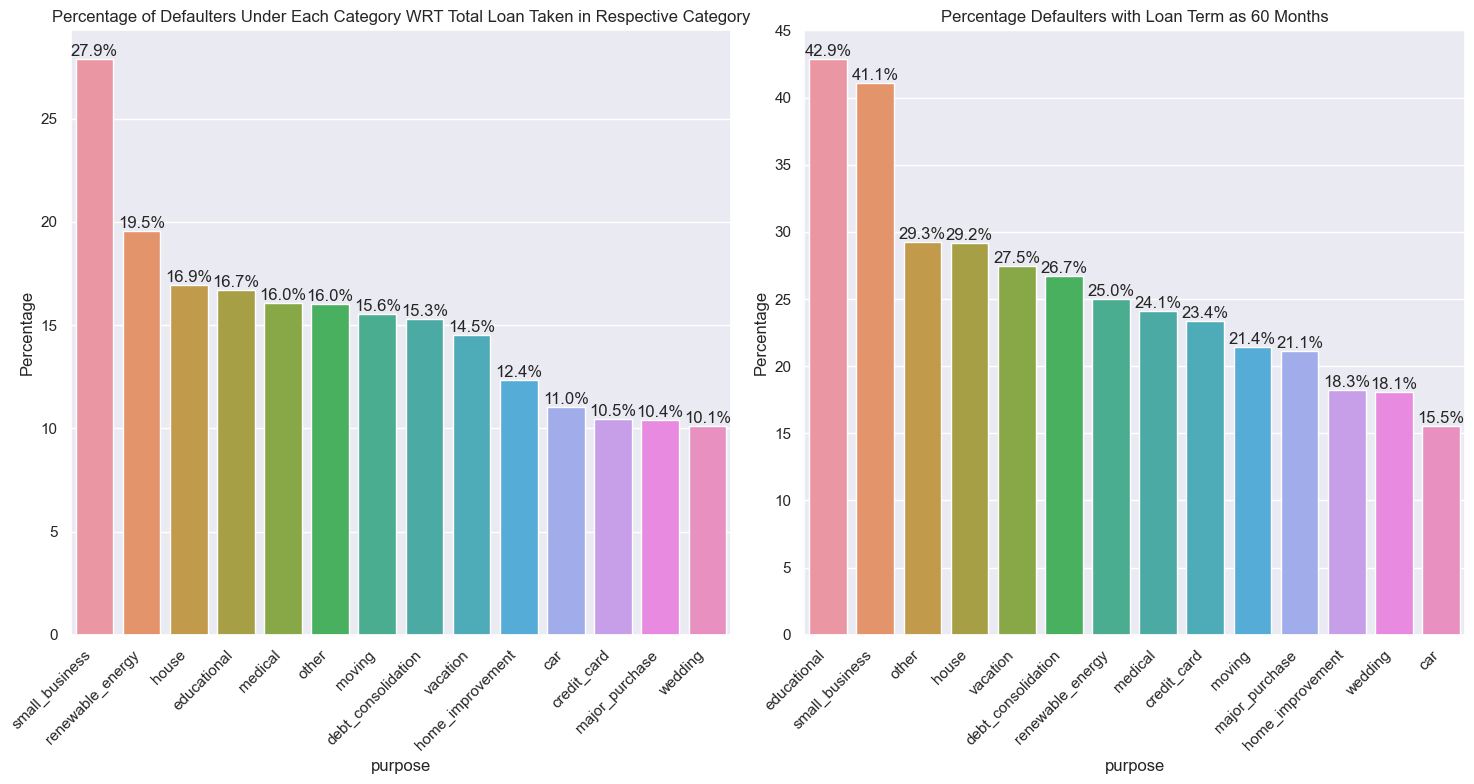

In [205]:

print(loan_df['loan_status'].unique())
# Creating Pivot table with purpose as index and loan_status as columns
purpose_loan_pivot = pd.pivot_table(data=loan_df, index="purpose", columns="loan_status", values="id", aggfunc="count")

# Check column names in the pivot table
print(purpose_loan_pivot.columns)

# Add Percentage column to get the percentage of people defaulted under each purpose category wrt loan taken under each category
purpose_loan_pivot["Percentage"] = purpose_loan_pivot["Charged Off"] / (purpose_loan_pivot["Fully Paid"] + purpose_loan_pivot["Charged Off"]) * 100

# Sort pivot table on Percentage
purpose_loan_pivot.sort_values("Percentage", ascending=False, inplace=True)

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Subplot 1 - Bar Plot
ax1 = sns.barplot(data=purpose_loan_pivot, x=purpose_loan_pivot.index, y="Percentage", ax=axes[0])
axes[0].set_title('Percentage of Defaulters Under Each Category WRT Total Loan Taken in Respective Category')

# Rotate x-axis tick labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Annotate percentage values
for p in ax1.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom')

# Segmenting data with loans taken under 60 months term category
term_60_data = loan_df[loan_df.term == 60]

# Creating Pivot table for purpose as index and loan_status as columns for df with loans taken under 60 months term category
term_60_loan_pivot = pd.pivot_table(data=term_60_data, index="purpose", columns="loan_status", values="id", aggfunc="count")

# Check column names in the pivot table for 60 months term
print(term_60_loan_pivot.columns)

# Add Percentage column to get the percentage of people defaulted under each category wrt loan taken under each category
term_60_loan_pivot["Percentage"] = term_60_loan_pivot["Charged Off"] / (term_60_loan_pivot["Fully Paid"] + term_60_loan_pivot["Charged Off"]) * 100

# Sort pivot table on Percentage
term_60_loan_pivot.sort_values("Percentage", ascending=False, inplace=True)

# Subplot 2 - Bar Plot
ax2 = sns.barplot(data=term_60_loan_pivot, x=term_60_loan_pivot.index, y="Percentage", ax=axes[1])
axes[1].set_title('Percentage Defaulters with Loan Term as 60 Months')

# Rotate x-axis tick labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Annotate percentage values
for p in ax2.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


- The above analysis with **purpose vs loan_status** gives interesting insights.
- **27.9%** of loans taken for the purpose of **small_business** end up as defaulters. This might be because of the failure of the business
- Another insight is that for loans taken under **60 months as term** and purpose as **educational** and **small_business** shows very high default rates of about **42.9%**  
- So lending loans for purposes such as **eductional** and **small_business** for longer terms of **60 months** have a very huge chance of defaulting
- There is another inference that, majority of loans taken for small_business, are taken under **high interest**, **G Grade**, and longer term **60 Months**, resulting in high chances of defaulting.

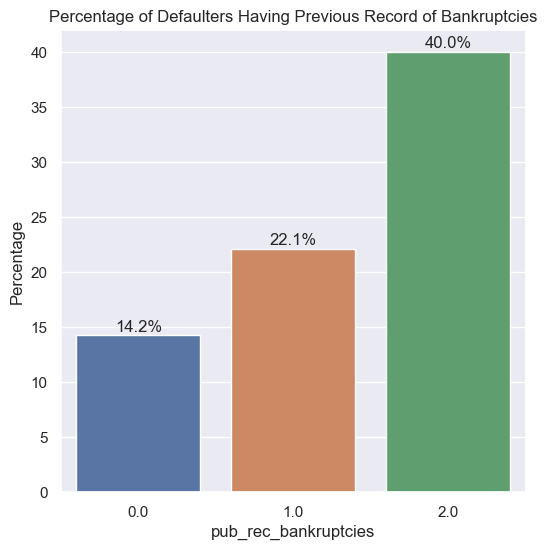

In [206]:
# Creating Pivot table for pub_rec_bankruptcies as index and loan_status as columns
bankruptcies_loan_pivot = pd.pivot_table(data=loan_df, index="pub_rec_bankruptcies", columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category
bankruptcies_loan_pivot ["Percentage"] = bankruptcies_loan_pivot["Charged Off"] / (bankruptcies_loan_pivot ["Fully Paid"] + bankruptcies_loan_pivot["Charged Off"]) * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=bankruptcies_loan_pivot, x=bankruptcies_loan_pivot.index, y="Percentage")
plt.title('Percentage of Defaulters Having Previous Record of Bankruptcies')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()  

- The above barplot of **pub_rec_bankruptcies vs percentage of defaulters** shows a indication that, people having previous record of bankruptcies tend to repeat that again in future.
- **40%** of those who take loans with a history of bankruptcies of **2** are tend to default. 
- So its better not to provide loans for those having previous records of bankruptcies

Bins considered in Equal Width Binning method are :
0 - 10 (Low)
10 - 20 (Medium)
20 - 30 (High)


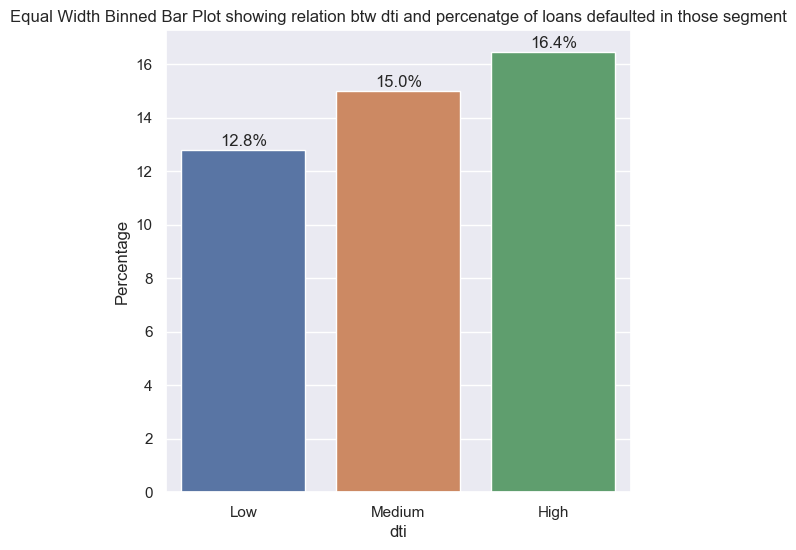

In [207]:
# Bucketing dti into 3 divisons using 2 methods, Quantile Binning and Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = loan_df.dti.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
dti_eq_width = pd.cut(loan_df.dti, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for dti_eq_width as index and loan_status as columns
pivot_dti_eq_width = pd.pivot_table(data=loan_df, index=dti_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_dti_eq_width ["Percentage"] = pivot_dti_eq_width["Charged Off"] / (pivot_dti_eq_width ["Fully Paid"] + pivot_dti_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_dti_eq_width, x=pivot_dti_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw dti and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

Bins considered in Equal Frequency Binning (Quantile Binning) are :
0.0 - 10.23 (Low)
10.23 - 16.9 (Medium)
16.9 - 29.99 (High)


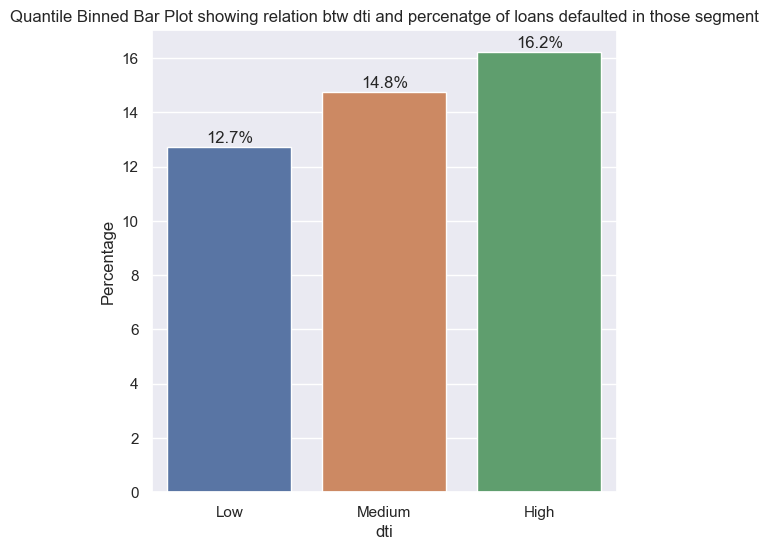

In [208]:
# Bucketing based on Equal Frequency Binning (Quantile Binning)
labels_ = ["Low", "Medium", "High"]
dti_quantile_cut, bins_ = pd.qcut(loan_df.dti, q=3, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for dti_quantile_cut as index and loan_status as columns
pivot_dti_quantile_cut = pd.pivot_table(data=loan_df, index=dti_quantile_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_dti_quantile_cut ["Percentage"] = pivot_dti_quantile_cut["Charged Off"] / (pivot_dti_quantile_cut ["Fully Paid"] + pivot_dti_quantile_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_dti_quantile_cut, x=pivot_dti_quantile_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw dti and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()   

- The above 2 plots indicating realtionship btw **dti and Percentage of defaulters in each segment**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns.
- From analysis of 2 binning method one can come to a conclusion that as the **dti increases chances of defaulting also increases**
- So lending out loans to **higher dti applications can be reduced**

Bins considered in Equal Width Binning method are :
0.00 - 0.26 (Low)
0.26 - 0.52 (Medium)
0.52 - 0.78 (High)


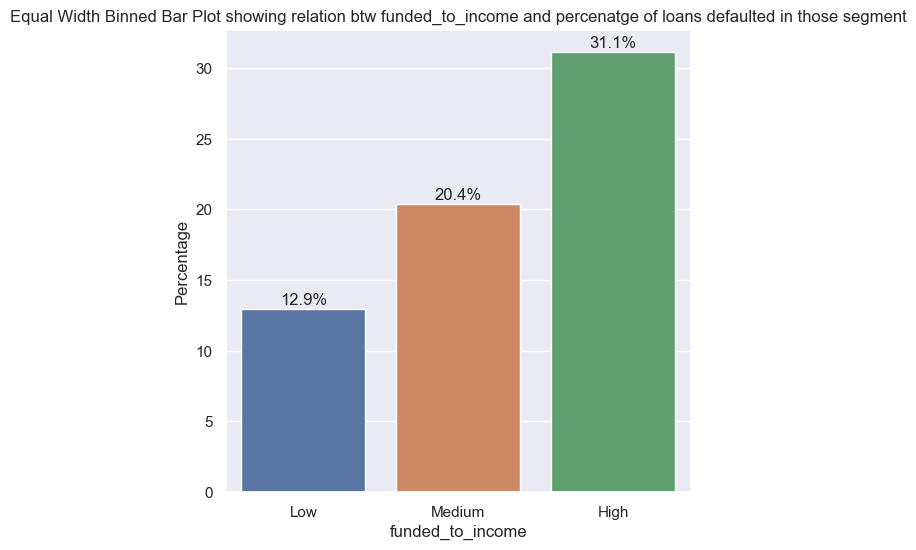

In [209]:
# Bucketing funded_to_income into 3 divisons using 2 methods, Quantile Binning and Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = loan_df.funded_to_income.max()/bin_number
bins_ = [(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0:.2f} - {1:.2f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
fti_eq_width = pd.cut(loan_df.funded_to_income, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for fti_eq_width as index and loan_status as columns
pivot_fti_eq_width = pd.pivot_table(data=loan_df, index=fti_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_fti_eq_width ["Percentage"] = pivot_fti_eq_width["Charged Off"] / (pivot_fti_eq_width ["Fully Paid"] + pivot_fti_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_fti_eq_width, x=pivot_fti_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw funded_to_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

Bins considered in Equal Frequency Binning (Quantile Binning) are :
0.00 - 0.11 (Low)
0.11 - 0.21 (Medium)
0.21 - 0.78 (High)


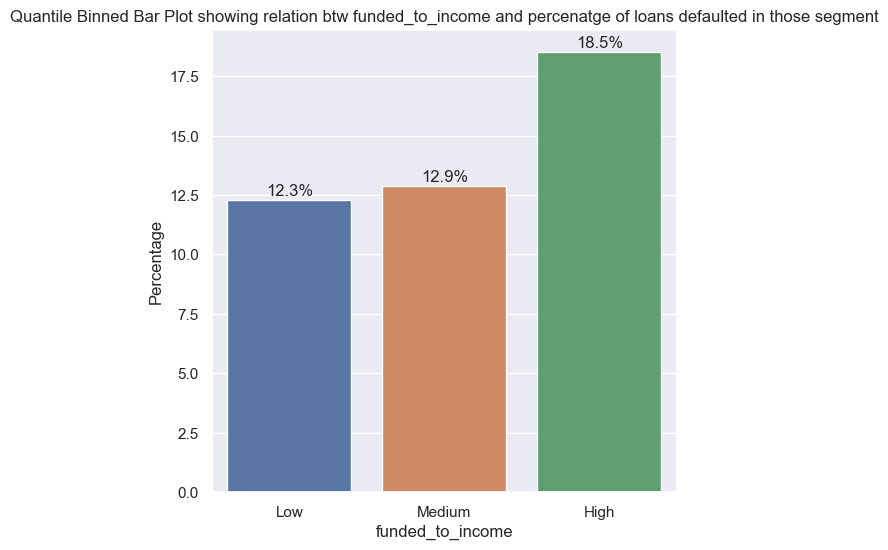

In [210]:
# Bucketing based on Equal Frequency Binning (Quantile Binning)

# Binning using qcut method in pandas
labels_ = ["Low", "Medium", "High"]
fti_quantile_cut, bins_ = pd.qcut(loan_df.funded_to_income, q=3, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0:.2f} - {1:.2f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for fti_quantile_cut as index and loan_status as columns
pivot_fti_quantile_cut = pd.pivot_table(data=loan_df, index=fti_quantile_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_fti_quantile_cut ["Percentage"] = pivot_fti_quantile_cut["Charged Off"] / (pivot_fti_quantile_cut ["Fully Paid"] + pivot_fti_quantile_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_fti_quantile_cut, x=pivot_fti_quantile_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw funded_to_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

- The above 2 plots indicating realtionship btw **funded_to_income and Percentage of defaulters in each segment**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns.
- From analysis of 2 binning method one can come to a conclusion that as the **funded_to_income increases chances of defaulting also increases**
- From plot generated using **Equal Width Binning**, its clear that almost **31.1%** of loans got defaulted whose funded_to_income ratio was above **0.52**
- So lending out loans to **higher funded_to_income ratio applications can be reduced**

Bins considered in Equal Frequency Binning (Quantile Binning) are :
4000 - 37000 (Very Low)
37000 - 50000 (Low)
50000 - 64500 (Medium)
64500 - 84996 (High)
84996 - 140004 (Very High)


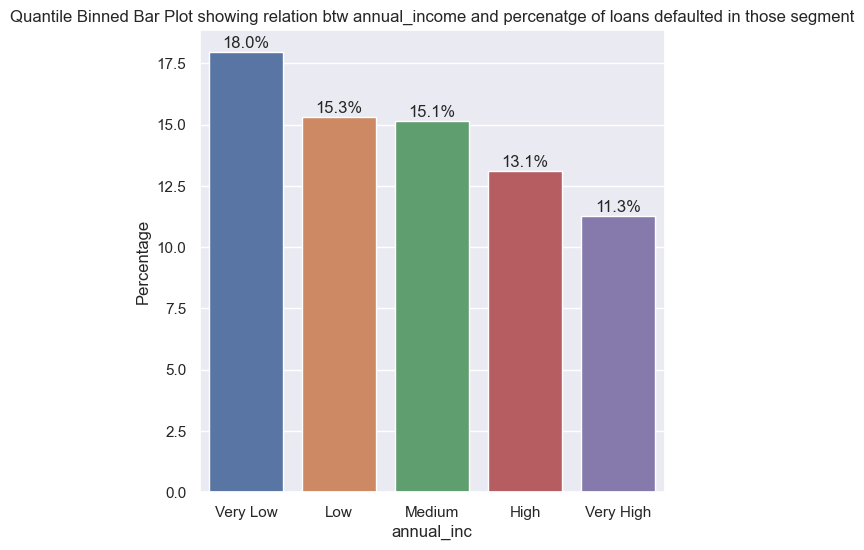

In [211]:
# Bucketing annual_inc into 5 divisons using Equal Frequency Binning (Quantile Binning) and plotting to see patterns

# Binning using qcut method in pandas
labels_ = ["Very Low", "Low", "Medium", "High", "Very High"]
annual_inc_q_cut, bins_ = pd.qcut(loan_df.annual_inc, q=5, labels=labels_, retbins=True)

# print bins_
print("Bins considered in Equal Frequency Binning (Quantile Binning) are :")
for b in range(0, len(bins_) - 1):
    print("{0:.0f} - {1:.0f} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Creating Pivot table for annual_inc_q_cut as index and loan_status as columns
pivot_annual_inc_q_cut = pd.pivot_table(data=loan_df, index=annual_inc_q_cut, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_annual_inc_q_cut ["Percentage"] = pivot_annual_inc_q_cut["Charged Off"] / (pivot_annual_inc_q_cut ["Fully Paid"] + pivot_annual_inc_q_cut["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_annual_inc_q_cut, x=pivot_annual_inc_q_cut.index, y="Percentage")
plt.title('Quantile Binned Bar Plot showing relation btw annual_income and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

- The above plot indicating realtionship btw annual_income and Percentage of defaulters in each segment, binned using Quantile Binning technique shows some interseting analysis.
- Most of the **defaulters lie on the lowest income range**
- There is a trend that as the **annual_inc decreases chances of defaulting increases**

Bins considered in Equal Width Binning method are :
0 - 7000 (Very Low)
7000 - 14000 (Low)
14000 - 21000 (Medium)
21000 - 28000 (High)
28000 - 35000 (Very High)


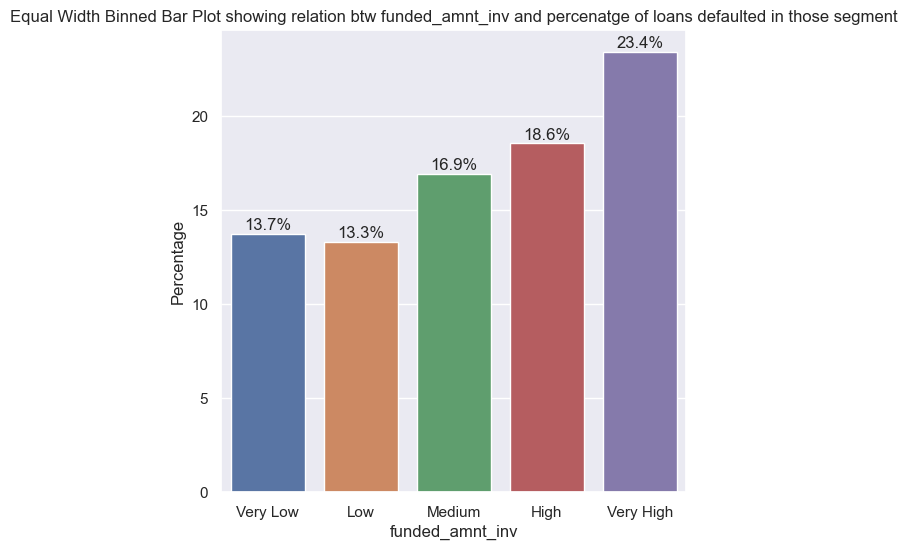

In [212]:
# Bucketing funded_amnt_inv into 5 divisons using Equal Width Binning and plotting to see patterns

# Bucketing based on Equal Width Binning method
bin_number = 5
bin_increment = loan_df.funded_amnt_inv.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Very Low", "Low", "Medium", "High", "Very High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
funded_eq_width = pd.cut(loan_df.funded_amnt_inv, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for funded_amnt_inv as index and loan_status as columns
pivot_funded_eq_width = pd.pivot_table(data=loan_df, index=funded_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_funded_eq_width ["Percentage"] = pivot_funded_eq_width["Charged Off"] / (pivot_funded_eq_width ["Fully Paid"] + pivot_funded_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_funded_eq_width, x=pivot_funded_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw funded_amnt_inv and percenatge of loans defaulted in those segment')
    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show()  

- The above plot indicating realtionship btw funded_amnt_inv and Percentage of defaulters in each segment, binned using Equal Width Binning technique shows some interseting analysis.
- Most of the **High Funded loans are the one most tend to default** 
- There is a trend that as the **funded amount by investors increases chances of defaulting increases**

Bins considered in Equal Width Binning method are :
0 - 10825 (Low)
10825 - 21650 (Medium)
21650 - 32475 (High)


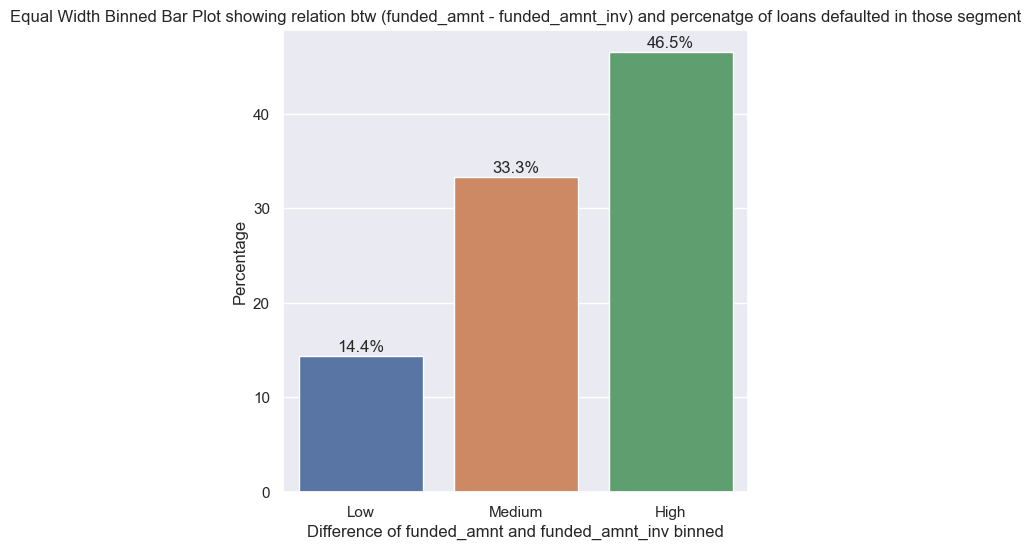

In [213]:
# Bucketing (funded_amnt - funded_amnt_inv) - into 3 divisons using Equal Width Binning and plotting to see patterns

# Getting the difference of funded_amnt and funded_amnt_inv, inorder to see if any patters are there btw the approved and delivered loan amounts 
diff = loan_df.funded_amnt - loan_df.funded_amnt_inv

# Bucketing based on Equal Width Binning method
bin_number = 3
bin_increment = diff.max()/bin_number
bins_ = [math.ceil(x * bin_increment) for x in range(0,bin_number + 1)]
labels_ = ["Low", "Medium", "High"]

# print bins_
print("Bins considered in Equal Width Binning method are :")
for b in range(0, len(bins_) - 1):
    print("{0} - {1} ({2})".format(bins_[b], bins_[b+1], labels_[b]))

# Binning using cut method in pandas
diff_eq_width = pd.cut(diff, bins=bins_, labels=labels_, right=False)

# Creating Pivot table for diff as index and loan_status as columns
pivot_diff_eq_width = pd.pivot_table(data=loan_df, index=diff_eq_width, columns="loan_status", values="id", aggfunc="count")    

# Adding Percentage column to get the percentage of people deafulted under each category wrt loan taken under each category
pivot_diff_eq_width ["Percentage"] = pivot_diff_eq_width["Charged Off"] / (pivot_diff_eq_width ["Fully Paid"] + pivot_diff_eq_width["Charged Off"])  * 100

# Resizing the graph
plt.figure(figsize=(6,6))

# Bar Plot with seaborn
bx = sns.barplot(data=pivot_diff_eq_width, x=pivot_diff_eq_width.index, y="Percentage")
plt.title('Equal Width Binned Bar Plot showing relation btw (funded_amnt - funded_amnt_inv) and percenatge of loans defaulted in those segment')
plt.xlabel("Difference of funded_amnt and funded_amnt_inv binned")    
# Annotate percentage values
for p in bx.patches:
    percentage = f'{p.get_height():.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bx.annotate(percentage, (x, y), ha='center', va='center')

plt.show() 

### Inferences from Bivariate Analysis -

1) **term vs loan_status**
- People opted for longer duration installments i.e. **60 months** are going to default more, than people opted shorter duration i.e. **36 months**
- From **Term vs Loan Status** Analysis, its clear that out of **8714** who opted for **60 Months** as term **2230** has defaulted, means around **25.6 %**, where as for those opted **36 Months** only **2963** out of **26953** defaulted, thats just **11%**

2) **purpose vs loan_status**
- From **Purpose vs Loan_status** analysis, its clear that **27.9%** of loans taken for the purpose of **small_business** end up as defaulters. This might be because of the failure of the business.
- Another insight is that for loans taken under **60 months as term** and purpose as **eductional** and **small_business** shows very high default rates of about **42.9%**  

3) **dti vs loan_status**
- From **dti vs Loan Status** analysis, binned in 2 different methods **Equal Width Binning** and **Quantile Binning** shows almost similar patterns, that as the **dti increases chances of defaulting also increases**

4) **funded_to_income vs loan_status**
- Similar analysis was made from realtionship btw **funded_to_income vs loan_status**, binned in 2 different methods **Equal Width Binning** and **Quantile Binning**.
- From analysis of 2 binning method one can come to a conclusion that as the **funded_to_income increases chances of defaulting also increases**
- From plot generated using **Equal Width Binning** for **funded_to_income vs loan_status**, its clear that almost **31.1%** of loans got defaulted whose funded_to_income ratio was above **0.52**

5) **annual_inc vs loan_status**
- From **Annual Income vs Loan Status** analysis, it was found that as **annual_inc decreases chances of defaulting increases**

6) **funded_amnt_inv vs loan_status**
- From **Funded_amnt_inv vs loan_status** analysis, it was found that as  **funded amount by investors increases chances of defaulting increases**

7) **pub_rec_bankruptcies vs percentage of defaulters**
- **pub_rec_bankruptcies vs percentage of defaulters** shows a indication that, people having previous record of bankruptcies tend to repeat that again in future.
- Around **40%** of those who take loans with a history of bankruptcies of **2** are tend to default. 

8) **difference of funded_amnt and funded_amnt_inv vs loan_status**
- Analysising realtionship btw the **difference of funded_amnt and funded_amnt_inv**, and Percentage of defaulters in each segment, binned using Equal Width Binning technique shows very interseting analysis.
- So if the difference btw **approved amount from LC and amount funded by investors** increases, means the tendency for that loan to deafult is very high
- For loans which had a difference in **approved amount from LC and amount funded by investors** greater than **21.6K**, around **46.5%** of such loans was defaulted